In [1]:
%matplotlib inline

# This script contains the process of extracting an embedded chemical sample from an Image.
# Chemometric analysis is then performed once the image is successfully extracted.

import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

C:\Users\Cadrev\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
img        = cv2.imread('sample.png')
orig       = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display    = orig.copy()

# Convert to HSV color space
hsv        = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Get the V channel on the HSV image
value      = cv2.blur(hsv[0:,0:,2],(5,5))
# Threshold the image
ret,thresh = cv2.threshold(value,90,255,0)
# Erode to remove artifacts
erode      =  cv2.erode(thresh,(50,100),iterations = 1)

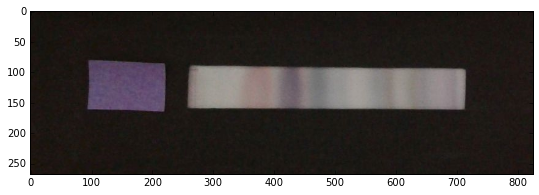

In [3]:
plt.figure(figsize=(9, 9))
plt.imshow(orig)

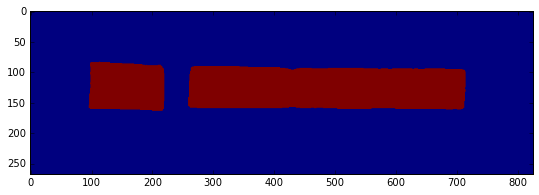

In [4]:
plt.figure(figsize=(9, 9))
plt.imshow(thresh)

In [5]:
# Contour sorting functions from left to right.
# We want to get the rightmost contour for this image samples
def leftToRight(a, b):
    
    # Sort the contours from left to right
    momA = cv2.moments(a)        
    (xa,ya) = int(momA['m10']/momA['m00']), int(momA['m01']/momA['m00'])

    momB = cv2.moments(b)        
    (xb,yb) = int(momB['m10']/momB['m00']), int(momB['m01']/momB['m00'])
    
    if xa>xb: 
        return 1

    if xa == xb:
        return 0
    else:
        return -1

image, contours, hierarchy = cv2.findContours(erode,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours.sort(leftToRight)

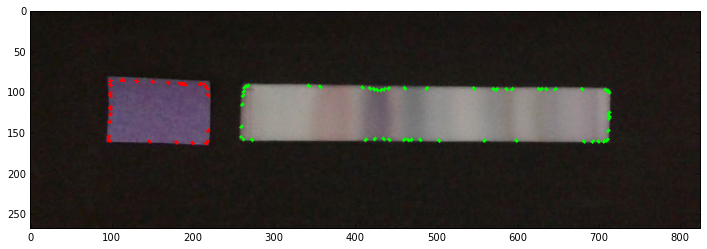

In [6]:
reference = contours[0]
sample    = contours[1]

img2 = cv2.drawContours(orig,reference,-1,(255,0,0),3)
img2 = cv2.drawContours(orig,sample,-1,(0,255,0),3)

plt.figure(figsize=(12, 12))
plt.imshow(img2)

In [7]:
# Extract the Region of Interest using the contour information
def getRoi(image, contour_points):
    #size = 0.85
    size = 0.85
    x,y,w,h = cv2.boundingRect(contour_points)
    h_new = int(h*size) 
    w_new = int(w*1.0)
    extension = int(w*0.15)
    print extension
    return image[y:y+h_new, x:x+w_new]

In [8]:
sample_roi    = getRoi(display,sample)
reference_roi = getRoi(display,reference)

68
18


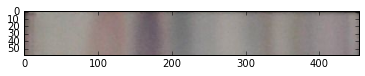

In [9]:
sample_roi.shape
plt.imshow(sample_roi[0:450])

In [19]:
# We perform lighting correction on the image.
# First step is to convert the image into a Lab color space
#  -- Lab color space is a color-opponent space with dimension
#     L for lightness and a and b for the color-opponent dimensions.

revert = cv2.cvtColor(sample_roi, cv2.COLOR_RGB2BGR)
lab    = cv2.cvtColor(revert, cv2.COLOR_BGR2Lab)

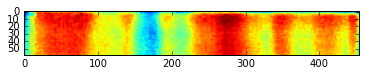

In [18]:
plt.imshow(lab[:,:,0])

In [13]:
# We apply Contrast Limited Adaptive Histogram Equalization 
# on the Lab channel to correct the brightness of the image. 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
cl1 = clahe.apply(lab[:,:,0])

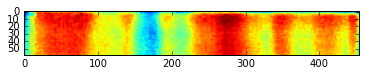

In [14]:
plt.imshow(cl1)

In [15]:
lab[:,:,0] = cl1

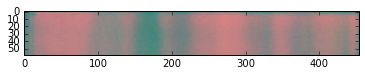

In [16]:
plt.imshow(lab)

In [17]:
# The corrected image brightness on the Lab colorspace is then returned
# to the BGR color space.
back_to_orig = cv2.cvtColor(lab, cv2.COLOR_Lab2BGR)
clean        = cv2.cvtColor(back_to_orig, cv2.COLOR_BGR2RGB)

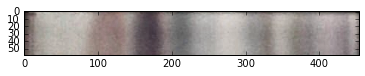

In [20]:
plt.imshow(clean)

In [ ]:
cv2.imwrite('extract_sample.png',back_to_orig)